# Tutorial 11 - Neural Networks

*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

---
**This tutorial will cover:**

*   compare supervised machine learning methods: logistic regression vs multilayer perceptron using scikit-learn
*   keras libarary: "regular" neural network vs convolutional neural network

---

## Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Import datasets, classifiers and performance metrics


In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

### Load digits dataset from scikit-learn

In [ ]:
digits = datasets.load_digits()

In [ ]:
np.shape(digits["images"])

(1797, 8, 8)

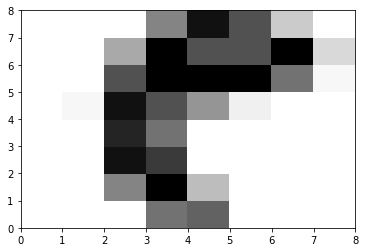

In [ ]:
plt.pcolor(digits["images"][66], cmap="Greys")

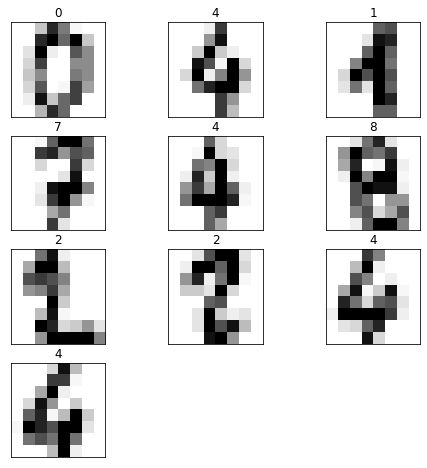

In [ ]:
plt.figure(figsize=(8, 8))
for ci, i in enumerate(np.arange(0, 1000, 100)):
    plt.subplot(4, 3, ci + 1)
    plt.imshow(digits["images"][i], cmap="Greys")
    plt.title(digits.target[i])
    plt.xticks([])
    plt.yticks([])

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
print("number of samples", n_samples)  #
print("original shape", np.shape(digits.images))  # 8*8 pixels
print("input for LogReg/MLP shape", np.shape(data))  # vec

number of samples 1797
original shape (1797, 8, 8)
input for LogReg/MLP shape (1797, 64)


### training-test split

In [ ]:
# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

## fit logisitic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_r = logistic_regression(solver="saga", max_iter=30)
log_r.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=30, solver='saga')

In [ ]:
log_r.score(x_train, y_train)

0.9979123173277662

In [ ]:
log_r.score(x_test, y_test)

0.9138888888888889

In [ ]:
np.shape(log_r.coef_)

(10, 64)

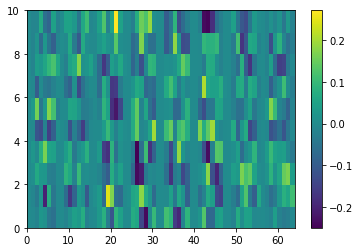

In [ ]:
plt.pcolor(logR.coef_)
plt.colorbar()
plt.

In [ ]:
np.shape(log_r.predict(x_train))

(1437,)

In [ ]:
np.shape(log_r.predict_proba(x_train))

(1437, 10)

In [ ]:
log_r.predict_proba(x_test)[15, :]

array([6.31081575e-04, 7.95337214e-07, 1.00867368e-04, 8.40388583e-04,
       1.34199982e-09, 1.92394263e-03, 7.20584484e-08, 9.31458945e-07,
       2.50650209e-03, 9.93995418e-01])

### fit multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = mlpClassifier(max_iter=50, hidden_layer_sizes=200)
mlp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=200, max_iter=50)

In [ ]:
mlp.score(x_train, y_train)

1.0

In [ ]:
mlp.score(x_test, y_test)

0.9138888888888889

In [ ]:
np.shape(mlp.predict_proba(x_test))

(360, 10)

### import a more interesting dataset
from the keras libarary we can import cifar10


https://www.cs.toronto.edu/~kriz/cifar.html


In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
### preprocessing

In [ ]:
x_train = x_train / 255.0
x_train_arr = x_train.reshape(x_train.shape[0], -1)

x_test = x_test / 255.0
x_test_arr = x_test.reshape(x_test.shape[0], -1)

In [ ]:
np.shape(x_train)

(50000, 32, 32, 3)

In [ ]:
labels = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

### visualize 16 examples

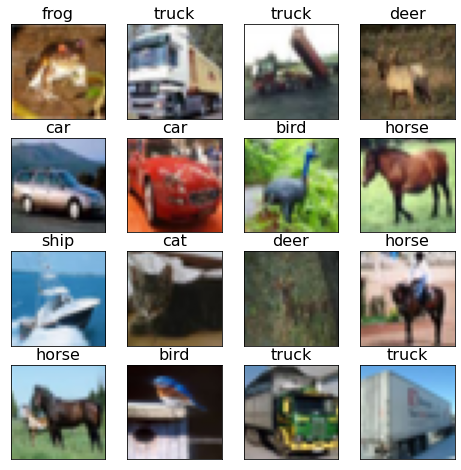

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i, :, :, :])
    plt.title(labels[int(y_train[i])], fontsize=16)
    plt.xticks([])
    plt.yticks([])

### visualize 6 examples from 5 categries

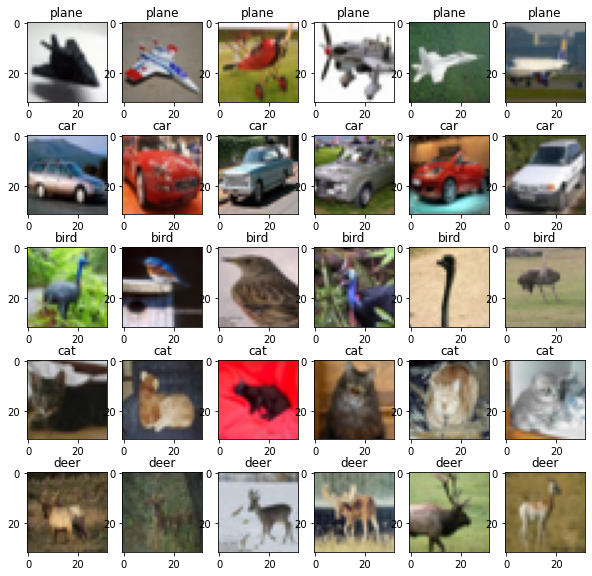

In [ ]:
n_cat = 5
n_ex = 6
fig, ax = plt.subplots(nrows=n_cat, ncols=n_ex, figsize=(10, 10))
for i in range(n_cat):
    idx = np.nonzero(y_train == i)[0]
    for e in range(n_ex):
        ax[i, e].imshow(x_train[idx[e], :, :, :])
        ax[i, e].set_title(labels[i])

## fit multilayer perceptron to the data and evaluate the fit

optional here: confusion matrix

In [ ]:
mlp = mlpClassifier(max_iter=30, hidden_layer_sizes=40)
mlp.fit(x_train_arr, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=40, max_iter=30)

In [ ]:
mlp.score(x_train_arr, y_train.ravel())

0.36998

In [ ]:
mlp.score(x_test_arr, y_test.ravel())

0.3564

In [ ]:
preds = mlp.predict(x_test_arr)

In [ ]:
ncat = 10
confmat = np.zeros((ncat, ncat))
for i in range(ncat):
    for j in range(ncat):
        confmat[i, j] = np.sum((y_test.ravel() == i) & (preds == j))

Text(0.5, 1.0, 'test confusion matrix')

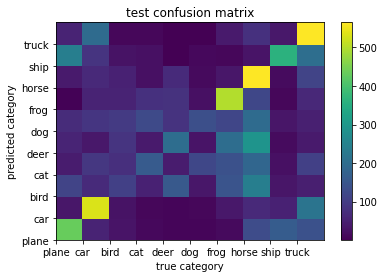

In [ ]:
plt.pcolor(confmat)
plt.colorbar()
xx = plt.xticks(np.arange(ncat), list(labels.values()))
yy = plt.yticks(np.arange(ncat), list(labels.values()))
plt.xlabel("true category")
plt.ylabel("predicted category")

plt.title("test confusion matrix")

## fit neural network with keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### set up network

In [ ]:
nn_model = sequential()
nn_model.add(dense(30, input_dim=np.shape(x_train_arr)[1], activation="relu"))
nn_model.add(dense(10, activation="softmax"))

In [ ]:
np.shape(x_train_arr)

(50000, 3072)

### compile

In [ ]:
nn_model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)


### one-hot encoding
to fit the model, we need to shift the Y to one-hot encoding (at least with this version of Keras)


https://datagy.io/sklearn-one-hot-encode/



In [ ]:
from sklearn.preprocessing import one_hot_encoder

enc = one_hot_encoder()
y_train_enc = enc.fit_transform(y_train).toarray()
y_test_enc = enc.fit_transform(y_test).toarray()

In [ ]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
nn_model.fit(x_train_arr, y_train_enc, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0898 - accuracy: 0.1933 - val_loss: 2.0647 - val_accuracy: 0.2184
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0223 - accuracy: 0.2303 - val_loss: 2.0292 - val_accuracy: 0.2340
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9905 - accuracy: 0.2434 - val_loss: 1.9953 - val_accuracy: 0.2404
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9789 - accuracy: 0.2443 - val_loss: 2.0095 - val_accuracy: 0.2410
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9746 - accuracy: 0.2464 - val_loss: 1.9779 - val_accuracy: 0.2376
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9675 - accuracy: 0.2443 - val_loss: 1.9742 - val_accuracy: 0.2514
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9636 - accuracy: 0.2452 - val_loss: 1.9696 - val_accuracy:

In [ ]:
np.shape(y_train)  # [0]

(50000, 1)

In [ ]:
np.shape(x_train_arr)  # [0]

(50000, 3072)

In [ ]:
_, accuracy = nn_model.evaluate(x_test_arr, y_test_enc)

313/313 [==============================] - 1s 3ms/step - loss: 1.9476 - accuracy: 0.2543


In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                92190     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 92,500
Trainable params: 92,500
Non-trainable params: 0
_________________________________________________________________


### fit Convolutional neural network with keras

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
dims = x_train.shape

## set up CNN
for this we need
1. convolutional layers (consisting of 64 filters in this case)
2. MaxPooling layers
3. flatten the input (among regions and colors)
4. Densely connected layers (that use softmax and peform the actual catagorization into 10 categories)

In [ ]:
model_cnn = sequential()

model_cnn.add(
    conv2_d(
        filters=64,
        kernel_size=2,
        padding="same",
        activation="relu",
        input_shape=(dims[1], dims[2], dims[3]),
    )
)
model_cnn.add(max_pooling2_d(pool_size=2))
model_cnn.add(flatten())
model_cnn.add(dense(10, activation="softmax"))

### compile model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

### fit model

#### fit 5 epochs

In [ ]:
model_cnn.fit(x_train, y_train_enc, epochs=5, validation_split=0.1)

Epoch 1/5
1407/1407 [==============================] - 48s 34ms/step - loss: 1.4757 - accuracy: 0.4827 - val_loss: 1.2660 - val_accuracy: 0.5566
Epoch 2/5
1407/1407 [==============================] - 43s 30ms/step - loss: 1.1915 - accuracy: 0.5851 - val_loss: 1.1876 - val_accuracy: 0.5842
Epoch 3/5
1407/1407 [==============================] - 41s 29ms/step - loss: 1.0952 - accuracy: 0.6200 - val_loss: 1.1291 - val_accuracy: 0.6112
Epoch 4/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.0314 - accuracy: 0.6447 - val_loss: 1.1128 - val_accuracy: 0.6220
Epoch 5/5
1407/1407 [==============================] - 40s 28ms/step - loss: 0.9818 - accuracy: 0.6648 - val_loss: 1.0994 - val_accuracy: 0.6202


#### fit 2 more epochs

In [ ]:
model_cnn.fit(x_train, y_train_enc, epochs=2, validation_split=0.1)

Epoch 1/2
1407/1407 [==============================] - 43s 30ms/step - loss: 0.9336 - accuracy: 0.6803 - val_loss: 1.0835 - val_accuracy: 0.6364
Epoch 2/2
1407/1407 [==============================] - 40s 29ms/step - loss: 0.8927 - accuracy: 0.6956 - val_loss: 1.0795 - val_accuracy: 0.6390


In [ ]:
_, accuracy = model_cnn.evaluate(x_test, y_test_enc)
print(accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 1.1074 - accuracy: 0.6215
0.6215000152587891


In [ ]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                163850    
                                                                 
Total params: 164,682
Trainable params: 164,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = model_cnn.predict(x_test)
print(preds[0:5, :])
print(np.shape(preds))
preds = np.argmax(preds, 1)
print(np.shape(preds))

[[3.4062257e-03 7.2040340e-05 9.2448052e-03 7.3404139e-01 5.9975992e-04
  1.0203958e-02 2.1369930e-02 6.0657365e-04 2.1993068e-01 5.2462396e-04]
 [5.4367289e-02 9.7024538e-02 6.5980078e-07 5.4518381e-07 7.0773368e-08
  1.0498676e-08 2.6387315e-07 9.3123695e-09 8.4832984e-01 2.7682973e-04]
 [5.4128921e-01 2.8038295e-02 5.5106599e-03 6.3472511e-03 6.6841181e-05
  2.8120729e-04 1.9602213e-04 6.0593366e-04 3.9391539e-01 2.3749202e-02]
 [4.0907338e-01 1.5612831e-02 3.8873237e-02 2.7188808e-03 2.2827530e-04
  7.3111245e-05 8.0108065e-03 7.8581565e-05 5.1902753e-01 6.3033043e-03]
 [6.6220791e-06 7.1168703e-04 5.8428794e-02 2.5866711e-01 5.1085722e-01
  1.3993697e-02 1.5672021e-01 3.1644956e-04 2.3005999e-04 6.8086134e-05]]
(10000, 10)
(10000,)


### confusion matrix on test set
include stimulus names

In [ ]:
confmat = np.zeros((ncat, ncat))
for i in range(ncat):
    for j in range(ncat):
        confmat[i, j] = np.sum((y_test.ravel() == i) & (preds == j))

Text(0, 0.5, 'predicted category')

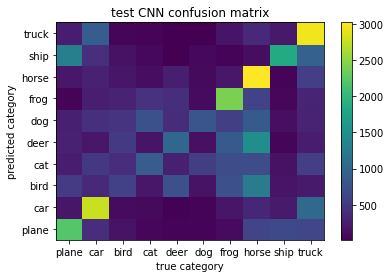

In [ ]:
plt.pcolor(confmat)
plt.colorbar()
xx = plt.xticks(np.arange(ncat) + 0.5, list(labels.values()))
plt.xlabel("true category")
yy = plt.yticks(np.arange(ncat) + 0.5, list(labels.values()))
plt.title("test CNN confusion matrix")
plt.ylabel("predicted category")

explore CNN parameters, and how changing them might improve classification on test set

options include:
- changing the size of the convolutonal kernels
- adding more convolutional and pooling layers